In [1]:
#simple_bias1="results/chrombpnet/ATAC_PE/GM12878/ATAC_PE_03.06.2022_simplebias/chrombpnet_model/footprints/"
main="/mnt/lab_data2/anusri/chrombpnet/"
chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs_uncorrected/motif_footprints.h5"
#tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.06.2022_tobias_with_bias_bigwig/tobias_model/footprints_motifs/motif_footprints.h5"
tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.08.2022_tobias_corrected_not_softmax_custom_shift/tobias_model/footprints_motifs/motif_footprints.h5"
hint_atac1=main+"results/hint_atac/ATAC_PE/GM12878/ATAC_PE_03.06.2022_hint_atac/hint_atac_model/footprints_motifs/motif_footprints.h5"
chrombpnet_corrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs/motif_footprints.h5"


In [2]:
import deepdish

In [3]:
uncorrected = deepdish.io.load(chrombpnet_uncorrected1)
tobias = deepdish.io.load(tobias1)
hint_atac = deepdish.io.load(hint_atac1)
chrombpnet = deepdish.io.load(chrombpnet_corrected1)


In [4]:
import matplotlib.pyplot as plt

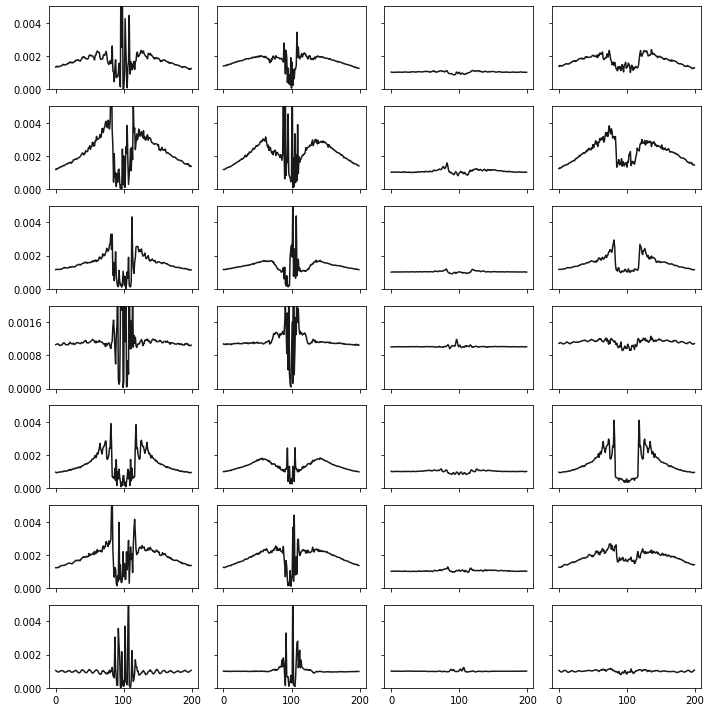

In [5]:
fig,axs = plt.subplots(7,4,figsize=(10,10),sharex=True,sharey='row')
motifs=["AP1", "ETS", "NFKB", "RUNX", "NRF1", "SPI1", "GATA+TAL"]
ylims=[0.005,0.005, 0.005, 0.002, 0.005, 0.005, 0.005]
for i in range(1,8):
    axs[i-1,0].plot(uncorrected[motifs[i-1]][0][400:600], alpha=0.9, label="uncorrected", c="k")
    axs[i-1,1].plot(hint_atac[motifs[i-1]][0][400:600], alpha=0.9, label="hint-atac", c="k")
    axs[i-1,2].plot(tobias[motifs[i-1]][0][400:600], alpha=0.9, label="tobias", c="k")
    axs[i-1,3].plot(chrombpnet[motifs[i-1]][0][400:600], alpha=0.9, label="chrombpnet", c="k")

    axs[i-1,0].set_ylim([0, ylims[i-1]])
    axs[i-1,1].set_ylim([0, ylims[i-1]])
    axs[i-1,2].set_ylim([0, ylims[i-1]])
    axs[i-1,3].set_ylim([0, ylims[i-1]])


    axs[i-1,3].yaxis.set_major_locator(plt.MaxNLocator(3))

plt.savefig("motifs_temp.png")
fig.tight_layout()